# XGBoostのdartを使用してみる！

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
kitchen_points.drop('コンロ3口', axis=1, inplace=True)
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_kitchen_points.drop('コンロ3口', axis=1, inplace=True)
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')


# X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, 
#                     stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D",'S']], 
#                     building,sepa_bath_toilets,over100m2, bt75and100m2, bt50and75m2, area_per_rooms, 
#                     ], axis=1)
# y_train = pd.read_csv('../data/handmade_data/rent.csv')
# y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
# X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, 
#                     test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],
#                     test_building, test_sepa_bath_toilets,test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms,
#                     ], axis=1)
# category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満', 
#                     'バス・トイレ別',
#                     'ガスコンロ', 'コンロ2口', '給湯','システムキッチン', '独立キッチン', 'コンロ3口', 'IHコンロ', '電気コンロ',
#                     'エアコン付','シューズボックス','バルコニー','室内洗濯機置場','敷地内ごみ置き場','エレベーター','水道その他','都市ガス','タイル張','ウォークインクローゼット','2面採光','3面採光','24時間換気システム','クッションフロア','庭','床暖房','ロフト','出窓','トランクルーム','オール電化',
#                     '専用バス','バス・トイレ別','シャワー','専用トイレ','浴室乾燥機','温水洗浄便座','洗面台独立','脱衣所','追焚機能',
#                     'インターネット対応','catv','csアンテナ','bsアンテナ','光ファイバー','インターネット使用料無料',
#                     '駐車場空有','駐車場空無','駐車場無','駐車場近隣','駐輪場空有','駐輪場無','バイク置き場無','バイク置き場空有'
#                     ]

X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, building, buildings, over100m2, bt75and100m2, area_per_rooms, 
kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size,test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_building, test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms, 
test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅', 'L', 'D','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', 'コンロ2口']

[19:26:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "evals", "evals_result", "reg_alfa", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:133017.21745	validation_1-rmse:131372.20167
[1]	validation_0-rmse:126708.15708	validation_1-rmse:125259.41704
[2]	validation_0-rmse:120764.80194	validation_1-rmse:119518.07255
[3]	validation_0-rmse:115144.14591	validation_1-rmse:114109.96985
[4]	validation_0-rmse:109814.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:95356.84467	validation_1-rmse:95070.82193
[8]	validation_0-rmse:90950.06131	validation_1-rmse:90841.96142
[9]	validation_0-rmse:86770.25376	validation_1-rmse:86857.81395
[10]	validation_0-rmse:82803.36791	validation_1-rmse:83070.83036
[11]	validation_0-rmse:79038.81592	validation_1-rmse:79530.55582
[12]	validation_0-rmse:75477.31545	validation_1-rmse:76158.42950
[13]	validation_0-rmse:72098.01890	validation_1-rmse:72893.31989
[14]	validation_0-rmse:68846.84636	validation_1-rmse:69826.20415
[15]	validation_0-rmse:65796.13448	validation_1-rmse:66960.39938
[16]	validation_0-rmse:63002.96550	validation_1-rmse:64302.79692
[17]	validation_0-rmse:60304.61865	validation_1-rmse:61760.07118
[18]	validation_0-rmse:57681.87181	validation_1-rmse:59269.69895
[19]	validation_0-rmse:55153.30472	validation_1-rmse:56907.72119
[20]	validation_0-rmse:52815.28581	validation_1-rmse:54717.12406
[21]	validation_0-rmse:50537.53948	validation_1-rmse:52560.25875
[22]	validation_0-rmse:48401

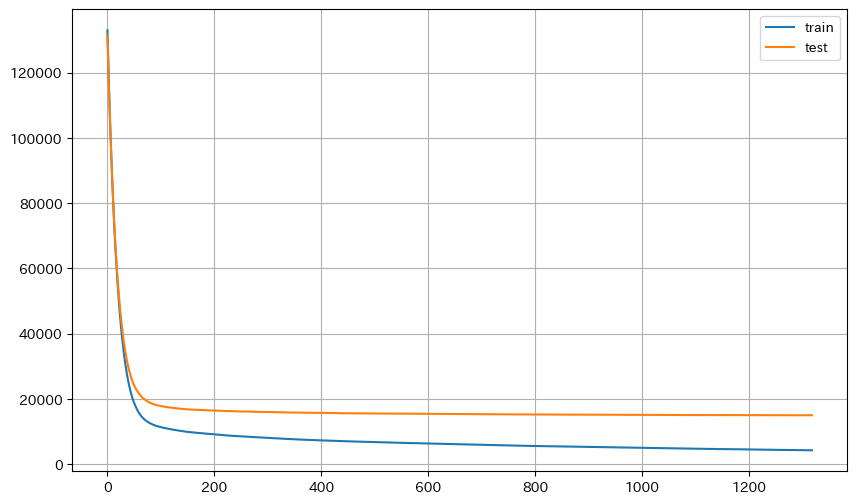

[19:47:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "evals", "evals_result", "reg_alfa", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:132769.98259	validation_1-rmse:132400.38947
[1]	validation_0-rmse:126481.65243	validation_1-rmse:126190.86491
[2]	validation_0-rmse:120570.87501	validation_1-rmse:120411.96932
[3]	validation_0-rmse:114962.49037	validation_1-rmse:114913.16097
[4]	validation_0-rmse:109652.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:99735.81180	validation_1-rmse:100016.33200
[7]	validation_0-rmse:95241.69533	validation_1-rmse:95540.92675
[8]	validation_0-rmse:90855.01186	validation_1-rmse:91205.99694
[9]	validation_0-rmse:86700.26374	validation_1-rmse:87117.19438
[10]	validation_0-rmse:82742.93378	validation_1-rmse:83310.39301
[11]	validation_0-rmse:78997.68469	validation_1-rmse:79669.68418
[12]	validation_0-rmse:75444.70250	validation_1-rmse:76257.23681
[13]	validation_0-rmse:72062.67295	validation_1-rmse:73070.52730
[14]	validation_0-rmse:68820.41486	validation_1-rmse:69964.82791
[15]	validation_0-rmse:65783.51568	validation_1-rmse:67003.88794
[16]	validation_0-rmse:62990.97025	validation_1-rmse:64380.62734
[17]	validation_0-rmse:60292.25387	validation_1-rmse:61821.68996
[18]	validation_0-rmse:57669.33820	validation_1-rmse:59338.93759
[19]	validation_0-rmse:55149.84315	validation_1-rmse:56986.63036
[20]	validation_0-rmse:52819.43145	validation_1-rmse:54795.17449
[21]	validation_0-rmse:50550

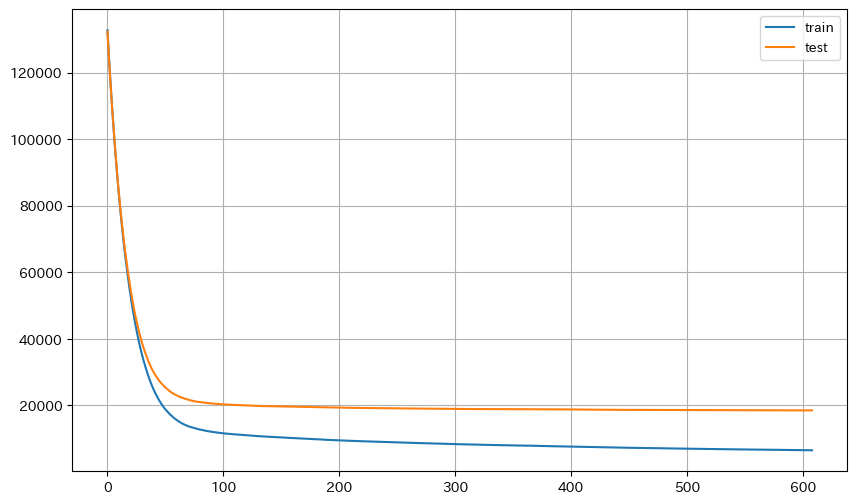

[19:52:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "evals", "evals_result", "reg_alfa", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:132317.77108	validation_1-rmse:134005.52819
[1]	validation_0-rmse:126051.97517	validation_1-rmse:127598.35379
[2]	validation_0-rmse:120159.06576	validation_1-rmse:121583.34605
[3]	validation_0-rmse:114557.75199	validation_1-rmse:115848.12097
[4]	validation_0-rmse:109267.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:99400.43795	validation_1-rmse:100488.32125
[7]	validation_0-rmse:94921.30639	validation_1-rmse:96018.06064
[8]	validation_0-rmse:90556.54589	validation_1-rmse:91595.54570
[9]	validation_0-rmse:86419.93887	validation_1-rmse:87402.77014
[10]	validation_0-rmse:82488.77652	validation_1-rmse:83510.24939
[11]	validation_0-rmse:78755.63631	validation_1-rmse:79767.25679
[12]	validation_0-rmse:75211.11408	validation_1-rmse:76211.75696
[13]	validation_0-rmse:71860.62871	validation_1-rmse:72890.96795
[14]	validation_0-rmse:68633.59561	validation_1-rmse:69635.81833
[15]	validation_0-rmse:65610.61104	validation_1-rmse:66670.78775
[16]	validation_0-rmse:62835.53852	validation_1-rmse:63929.30413
[17]	validation_0-rmse:60168.36070	validation_1-rmse:61300.27989
[18]	validation_0-rmse:57569.32667	validation_1-rmse:58774.38666
[19]	validation_0-rmse:55054.15792	validation_1-rmse:56245.51740
[20]	validation_0-rmse:52729.36080	validation_1-rmse:54017.72809
[21]	validation_0-rmse:50475

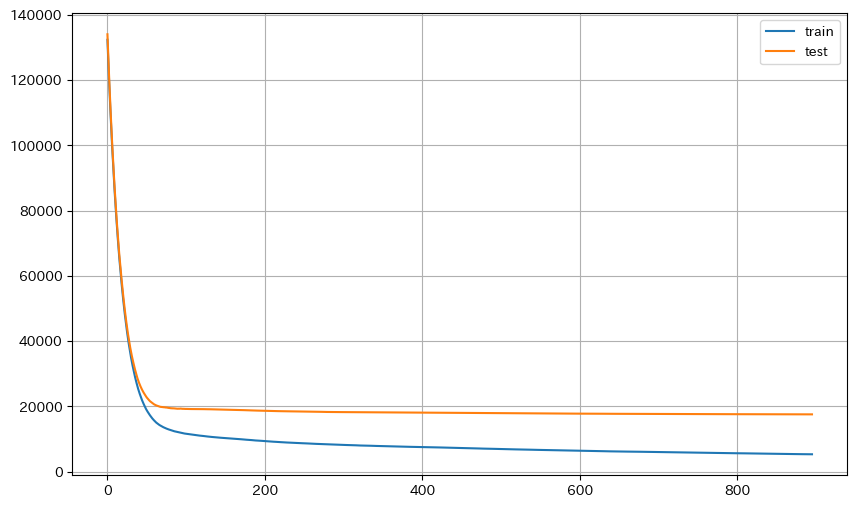

[20:02:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "evals", "evals_result", "reg_alfa", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:133012.78770	validation_1-rmse:131384.86554
[1]	validation_0-rmse:126710.42376	validation_1-rmse:125210.12122
[2]	validation_0-rmse:120764.32205	validation_1-rmse:119367.93647
[3]	validation_0-rmse:115148.37385	validation_1-rmse:113887.63016
[4]	validation_0-rmse:109814.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:99882.50331	validation_1-rmse:98828.73916
[7]	validation_0-rmse:95375.45408	validation_1-rmse:94459.17804
[8]	validation_0-rmse:90973.51160	validation_1-rmse:90172.42822
[9]	validation_0-rmse:86800.77448	validation_1-rmse:86118.11397
[10]	validation_0-rmse:82832.94518	validation_1-rmse:82238.27154
[11]	validation_0-rmse:79084.31971	validation_1-rmse:78596.45452
[12]	validation_0-rmse:75517.34362	validation_1-rmse:75142.35006
[13]	validation_0-rmse:72136.53709	validation_1-rmse:71856.67468
[14]	validation_0-rmse:68876.71730	validation_1-rmse:68695.43394
[15]	validation_0-rmse:65818.86481	validation_1-rmse:65775.36052
[16]	validation_0-rmse:63025.01576	validation_1-rmse:63102.74444
[17]	validation_0-rmse:60332.92280	validation_1-rmse:60521.72887
[18]	validation_0-rmse:57710.24656	validation_1-rmse:58026.43865
[19]	validation_0-rmse:55171.68356	validation_1-rmse:55622.65655
[20]	validation_0-rmse:52830.16597	validation_1-rmse:53408.48473
[21]	validation_0-rmse:50557.

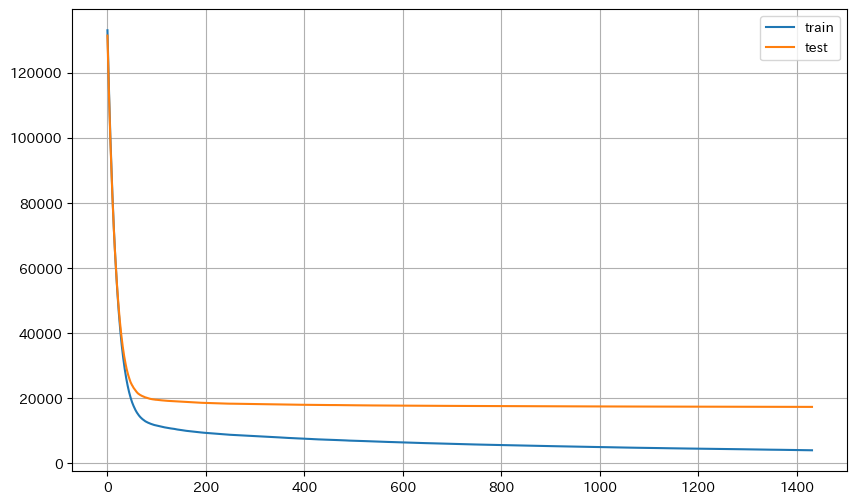

[20:43:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "evals", "evals_result", "reg_alfa", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:132295.40663	validation_1-rmse:134500.30599
[1]	validation_0-rmse:126038.51537	validation_1-rmse:128236.83476
[2]	validation_0-rmse:120162.31400	validation_1-rmse:122402.58272
[3]	validation_0-rmse:114589.53761	validation_1-rmse:116877.03922
[4]	validation_0-rmse:109314.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:99448.94640	validation_1-rmse:101716.79072
[7]	validation_0-rmse:94981.85712	validation_1-rmse:97282.52475
[8]	validation_0-rmse:90621.45381	validation_1-rmse:92866.04568
[9]	validation_0-rmse:86482.15634	validation_1-rmse:88759.50490
[10]	validation_0-rmse:82555.77051	validation_1-rmse:84790.17449
[11]	validation_0-rmse:78822.34082	validation_1-rmse:81080.05881
[12]	validation_0-rmse:75282.59425	validation_1-rmse:77567.54232
[13]	validation_0-rmse:71940.98942	validation_1-rmse:74264.69841
[14]	validation_0-rmse:68719.38808	validation_1-rmse:71132.74417
[15]	validation_0-rmse:65694.65920	validation_1-rmse:68166.41046
[16]	validation_0-rmse:62918.85748	validation_1-rmse:65369.52146
[17]	validation_0-rmse:60232.29591	validation_1-rmse:62693.00849
[18]	validation_0-rmse:57637.58182	validation_1-rmse:60076.06423
[19]	validation_0-rmse:55129.96857	validation_1-rmse:57475.96771
[20]	validation_0-rmse:52818.07245	validation_1-rmse:55100.65858
[21]	validation_0-rmse:50564

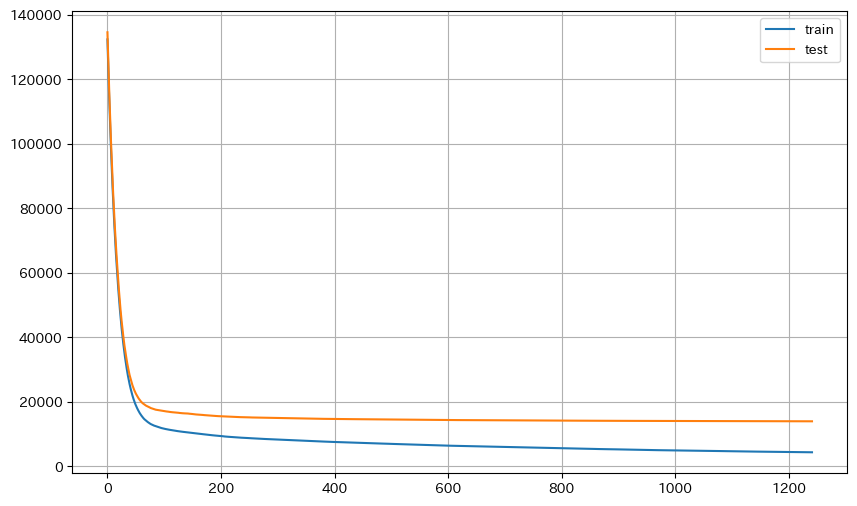

whole valid rmse: 16466.77650023861
Start predicting...


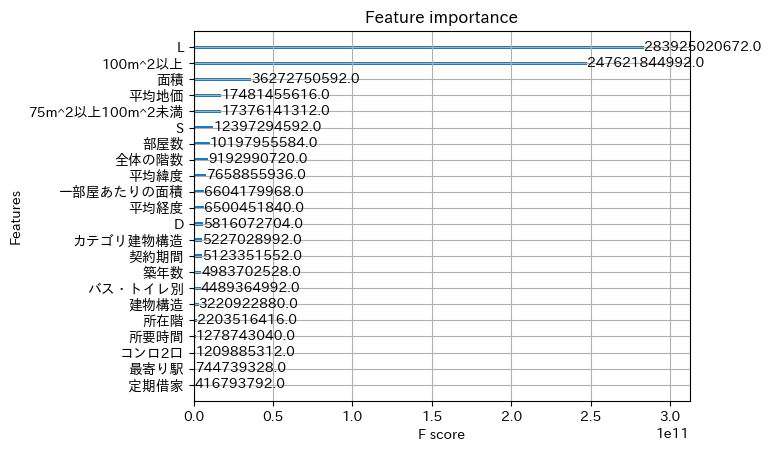

In [7]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GBDT = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    # 学習時に用いる検証用データ
    evals = [(X_tr, 'train'), (X_tr, 'eval')]
    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        # 回帰問題
                        objective='reg:linear',
                        # 学習用の指標 (RMSE)
                        eval_metric='rmse',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='dart',
                        #学習率
                        learning_rate=0.05,
                        #木の最大深さ
                        max_depth=7,
                        #シード値
                        random_state=0,
                            #正則化
                        reg_alfa=6.8594164113286965e-06,

                        sub_sample=0.16056047423047484,

                        colsample_bytree=0.6987351856651322,

                        min_child_weight=1.1103525577197584,
                        
                        evals=evals,

                        evals_result=evals_result
    )
    xgb_reg.fit(X_tr, y_tr, 
                eval_set=[(X_tr, y_tr),(X_val, y_val)], 
                early_stopping_rounds=10, 
            )
    evals_result = xgb_reg.evals_result()
    train_evals = evals_result['validation_0']['rmse']
    test_evals = evals_result['validation_1']['rmse']

    pred_y_val = xgb_reg.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

    # 学習の課程を折れ線グラフとしてプロットする
    print('Plot metrics during training...')
    plt.figure(figsize=(10, 6))
    plt.subplot(111)
    x = range(len(train_evals))
    plt.plot(x, train_evals, label='train')
    plt.plot(x, test_evals, label='test')
    # plt.plot(x, ave_cv_evals, label='validation')
    plt.grid()
    plt.legend()
    plt.show()

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

print('Start predicting...')
y_pred = xgb_reg.predict(X_test)

# feature importanceを表示
xgboost.plot_importance(xgb_reg, importance_type = "gain")
plt.show()

In [8]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
y_pred = pd.DataFrame(y_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('../data/result_data/XGB_DART_result2.csv',index=False)

### スコア16466というかなり良好なスコアを排出！

一回回すだけで二時間以上時間がかかってしまうのが問題・・・他の特徴量を入れたらもっと良くなるのかどうかも気軽には試せない